In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
import seaborn as sns
from sklearn import preprocessing
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [55]:
bank_classes = ['Not Exited','Exited']
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=bank_classes
               ,xticklabels=bank_classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

# Decision Tree (Dataset 1)

Test accuracy score without any tuning: 79.47
important features that affecting the predictions
Train accuracy score without any tuning: 100.00
important features that affecting the predictions
Train Confusion matrix


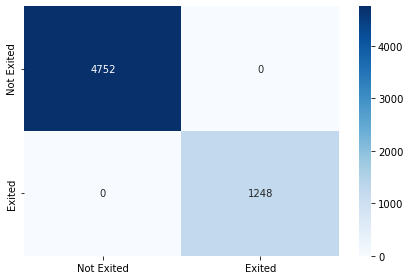

Test Confusion matrix


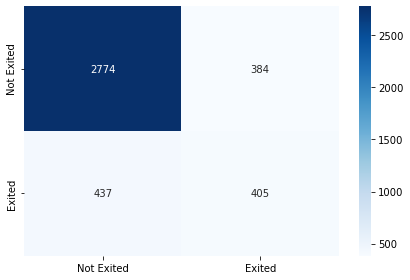

In [56]:
df_bc = pd.read_csv('bankchurn.csv')

#clean ups
df_bc = df_bc.drop(columns=['RowNumber','Surname','CustomerId'], axis = 1)
df_bc['Gender'] = df_bc['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_bc['Geography'] = df_bc['Geography'].apply(lambda x: 0 if x== 'France' else x)
df_bc['Geography'] = df_bc['Geography'].apply(lambda x: 1 if x== 'Spain' else x)
df_bc['Geography'] = df_bc['Geography'].apply(lambda x: 2 if x== 'Germany' else x)

x=df_bc.drop(columns=['Exited'])
y=df_bc['Exited']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state=5)

clf = DecisionTreeClassifier(random_state=5)
#clf = DecisionTreeClassifier(random_state=5, criterion='entropy')
clf = clf.fit(x_train, y_train)
feature_names = x.columns

predictions = clf.predict(x_test)
ac_score = accuracy_score(y_test,predictions) * 100
print("Test accuracy score without any tuning: %.2f" % ac_score)
print("important features that affecting the predictions")
tr_predictions = clf.predict(x_train)
tr_ac_score = accuracy_score(y_train,tr_predictions) * 100
print("Train accuracy score without any tuning: %.2f" % tr_ac_score)
print("important features that affecting the predictions")
y_train_pred = clf.predict(x_train)

train_cf = confusion_matrix(y_train_pred,y_train)
plot_confusionmatrix(y_train_pred,y_train,dom='Train')

y_test_pred = clf.predict(x_test)
train_cf = confusion_matrix(y_test_pred,y_test)
plot_confusionmatrix(y_test_pred,y_test,dom='Test')



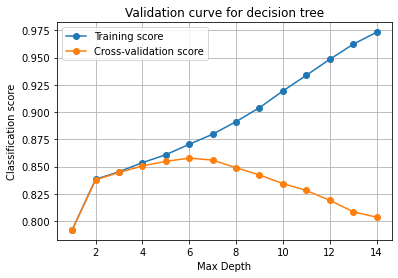

In [57]:
param_range_1 = np.arange(1, 15)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=5), x_train, y_train,
                                             param_name="max_depth", param_range=param_range_1, cv=5)


plt.figure()
plt.plot(param_range_1, np.mean(train_scores, axis=1), 'o-',label='Training score')
plt.plot(param_range_1, np.mean(test_scores, axis=1), 'o-',label='Cross-validation score')
plt.title('Validation curve for decision tree')
plt.xlabel('Max Depth')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()

#start_time = time.time()
param_range_2 = np.arange(1, 25)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=5), x_train, y_train,
                                             param_name="min_samples_leaf", param_range=param_range_2, cv=5)
#time_table['min_samples_leaf'] = [time.time() - start_time]

# plt.figure()
# plt.plot(param_range_2, np.mean(train_scores, axis=1), label='Training score')
# plt.plot(param_range_2, np.mean(test_scores, axis=1), label='Cross-validation score')
# plt.title('Validation curve for decision tree')
# plt.xlabel('Min Samples Leaf')
# plt.ylabel("Classification score")
# plt.legend(loc="best")
# plt.grid()

param_range_3 = np.arange(1, 25)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=5), x_train, y_train,
                                             param_name="min_samples_split", param_range=param_range_3, cv=5)
#time_table['min_samples_leaf'] = [time.time() - start_time]

# plt.figure()
# plt.plot(param_range_3, np.mean(train_scores, axis=1), label='Training score')
# plt.plot(param_range_3, np.mean(test_scores, axis=1), label='Cross-validation score')
# plt.title('Validation curve for decision tree')
# plt.xlabel('min_samples_split')
# plt.ylabel("Classification score")
# plt.legend(loc="best")
# plt.grid()

#time_table

In [58]:
start_time = time.time()
tuned_params = {'max_depth' : param_range_1, 'min_samples_leaf' : param_range_2}
#tuned_params = {'max_depth' : param_range_1, 'min_samples_leaf' : param_range_2,'min_samples_split':param_range_3  }
clf_dt = GridSearchCV(DecisionTreeClassifier(random_state=5), param_grid=tuned_params, cv=5)
clf_dt.fit(x_train, y_train)
print("Best parameters set found on development set:")
print(clf_dt.best_params_)
y_pred = clf_dt.predict(x_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of decision tree with 2 tuned params is %.2f%%' % (dt_accuracy * 100))
print("time spent:", time.time() - start_time)

Best parameters set found on development set:
{'max_depth': 6, 'min_samples_leaf': 7}
Accuracy of decision tree with 2 tuned params is 85.47%
time spent: 28.365840435028076


Best parameters set found on development set:
{'max_depth': 6}
Accuracy of decision tree with 2 tuned params is 85.65%
time spent: 1.3170080184936523
Test Confusion matrix


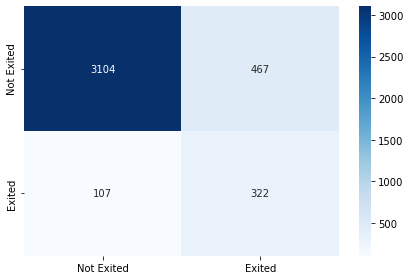

In [59]:
start_time = time.time()
tuned_params = {'max_depth' : param_range_1}
clf_md = GridSearchCV(DecisionTreeClassifier(random_state=5), param_grid=tuned_params, cv=5)
clf_md.fit(x_train, y_train)
print("Best parameters set found on development set:")
print(clf_md.best_params_)
y_pred = clf_md.predict(x_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of decision tree with 2 tuned params is %.2f%%' % (dt_accuracy * 100))
print("time spent:", time.time() - start_time)

y_test_pred = clf_md.predict(x_test)
train_cf = confusion_matrix(y_test_pred,y_test)
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [ ]:
start_time = time.time()
tuned_params = {'max_depth' : param_range_1, 'min_samples_leaf' : param_range_2,'min_samples_split':param_range_3  }
clf_dt = GridSearchCV(DecisionTreeClassifier(random_state=5), param_grid=tuned_params, cv=5)
clf_dt.fit(x_train, y_train)
print("Best parameters set found on development set:")
print(clf_dt.best_params_)
y_pred = clf_dt.predict(x_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of decision tree with 3 tuned params is %.2f%%' % (dt_accuracy * 100))
print("time spent:", time.time() - start_time)

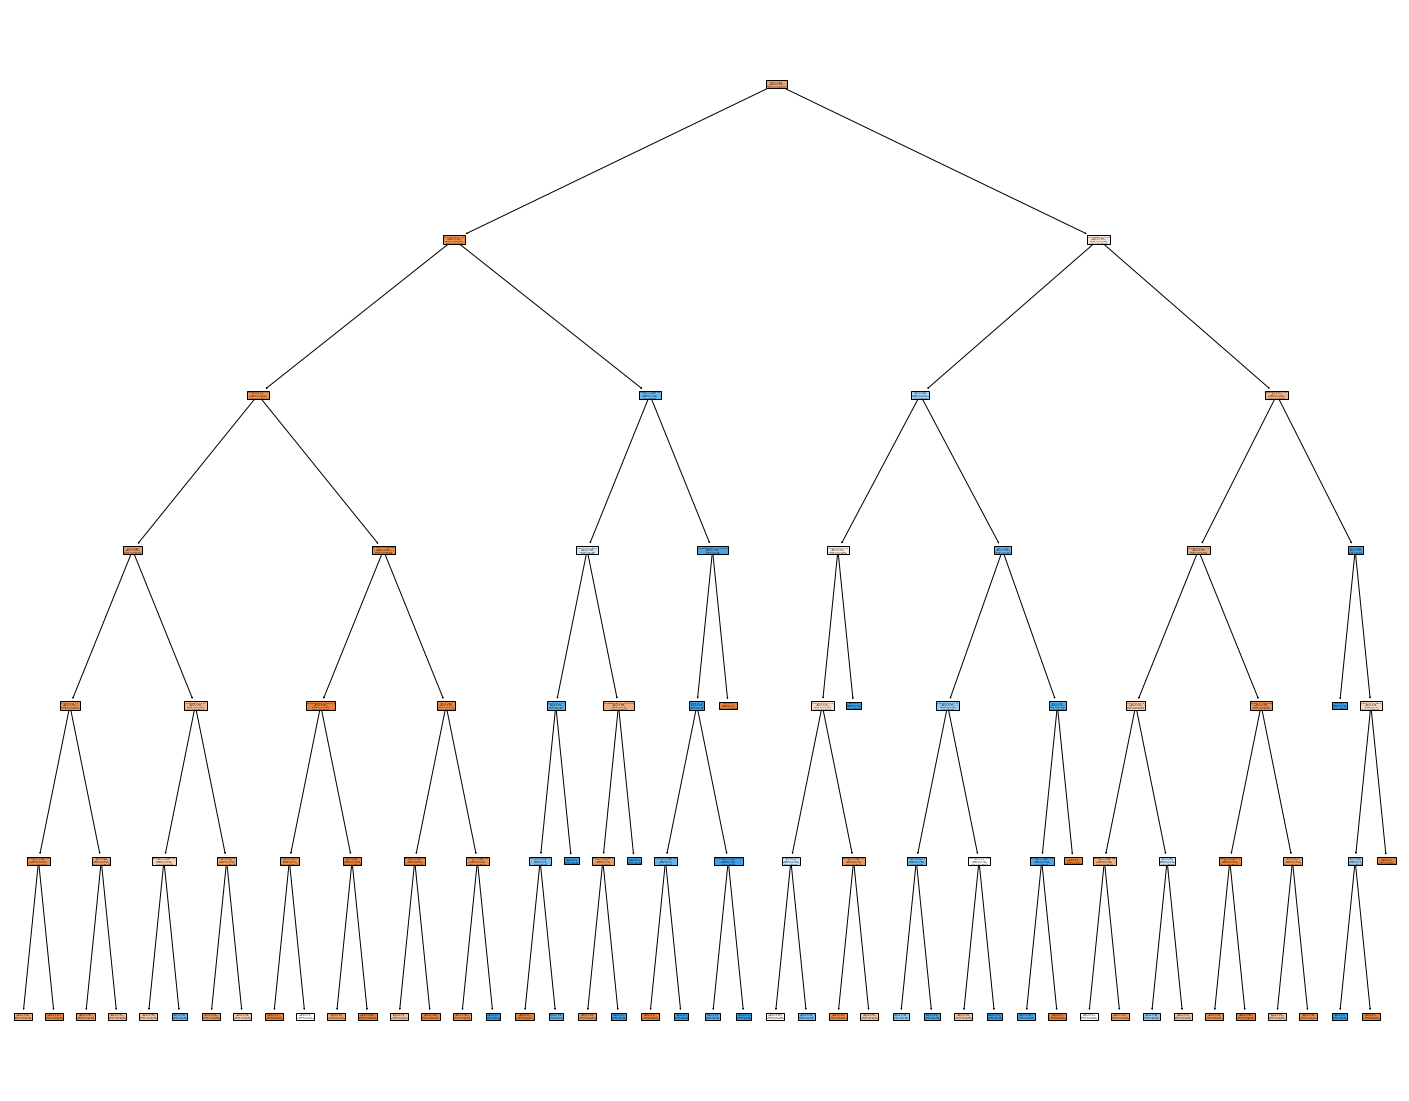

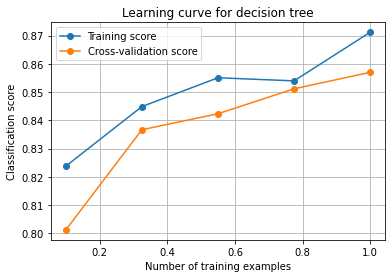

In [26]:
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(clf_md, x_train, y_train, train_sizes=train_sizes, cv=5)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_md.best_estimator_, feature_names = feature_names,
                  class_names={0:"Not Exited", 1:"Exited"},filled= True)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for decision tree')
plt.xlabel('Number of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()

# Decision Tree (Dataset 2)

Test accuracy score without any tuning: 90.37
important features that affecting the predictions
Train accuracy score without any tuning: 100.00
important features that affecting the predictions
Train Confusion matrix


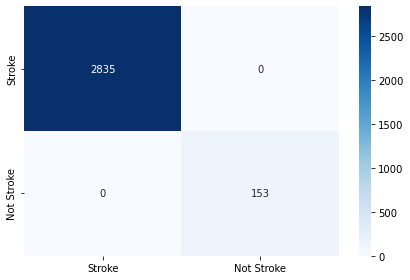

Test Confusion matrix


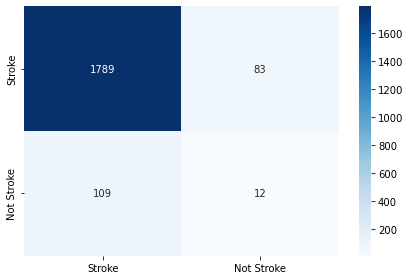

In [23]:
bs_classes = ['Stroke','Not Stroke']
def plot_confusionmatrix_bs(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=bs_classes
               ,xticklabels=bs_classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

df_bs = pd.read_csv('brainstroke.csv')
df_bs['gender'] = df_bs['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_bs['ever_married'] = df_bs['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df_bs['Residence_type'] = df_bs['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 1 if x == 'Private' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 2 if x == 'Self-employed' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 3 if x == 'Govt_job' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 4 if x == 'children' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 2 if x == 'smokes' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 3 if x == 'never smoked' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 4 if x == 'Unknown' else x)


x=df_bs.drop(columns=['stroke'])
y=df_bs['stroke']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state=5)


clf = DecisionTreeClassifier(random_state=5)
#clf = DecisionTreeClassifier(random_state=5, criterion='entropy')
clf = clf.fit(x_train, y_train)
feature_names = x.columns

predictions = clf.predict(x_test)
ac_score = accuracy_score(y_test,predictions) * 100
print("Test accuracy score without any tuning: %.2f" % ac_score)
print("important features that affecting the predictions")
tr_predictions = clf.predict(x_train)
tr_ac_score = accuracy_score(y_train,tr_predictions) * 100
print("Train accuracy score without any tuning: %.2f" % tr_ac_score)
print("important features that affecting the predictions")

y_train_pred = clf.predict(x_train)

train_cf = confusion_matrix(y_train_pred,y_train)
plot_confusionmatrix_bs(y_train_pred,y_train,dom='Train')

y_test_pred = clf.predict(x_test)
train_cf = confusion_matrix(y_test_pred,y_test)
plot_confusionmatrix_bs(y_test_pred,y_test,dom='Test')


Best parameters set found on development set:
{'max_depth': 1}
Accuracy of decision tree with 1 tuned params is 95.23%
time spent: 0.4869089126586914


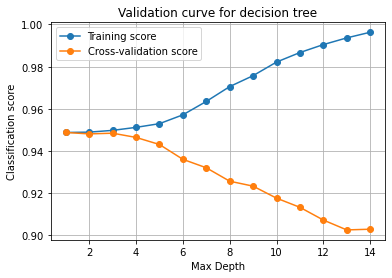

In [22]:
#start_time = time.time()
param_range_1 = np.arange(1, 15)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=5), x_train, y_train,
                                             param_name="max_depth", param_range=param_range_1, cv=5)
#time_table['max_depth'] = [time.time() - start_time]

plt.figure()
plt.plot(param_range_1, np.mean(train_scores, axis=1), 'o-',label='Training score')
plt.plot(param_range_1, np.mean(test_scores, axis=1), 'o-',label='Cross-validation score')
plt.title('Validation curve for decision tree')
plt.xlabel('Max Depth')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()

start_time = time.time()
tuned_params = {'max_depth' : param_range_1}
clf_md = GridSearchCV(DecisionTreeClassifier(random_state=5), param_grid=tuned_params, cv=5)
clf_md.fit(x_train, y_train)
print("Best parameters set found on development set:")
print(clf_md.best_params_)
y_pred = clf_md.predict(x_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of decision tree with 1 tuned params is %.2f%%' % (dt_accuracy * 100))
print("time spent:", time.time() - start_time)




Test Confusion matrix


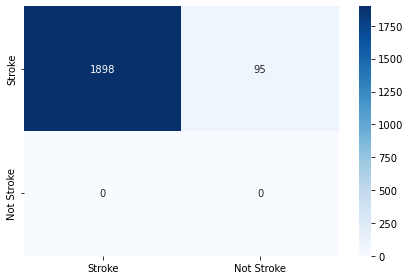

In [13]:
y_test_pred = clf_md.predict(x_test)
train_cf = confusion_matrix(y_test_pred,y_test)
plot_confusionmatrix_bs(y_test_pred,y_test,dom='Test')

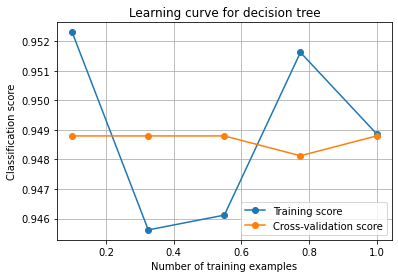

In [28]:
_, train_scores, test_scores = learning_curve(clf_md, x_train, y_train, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for decision tree')
plt.xlabel('Number of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()

In [21]:
param_range_1 = np.arange(1, 15)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=5), x_train, y_train,
                                             param_name="min_samples_split", param_range=param_range_1, cv=5)

start_time = time.time()
tuned_params = {'min_samples_split' : param_range_1}
clf_md = GridSearchCV(DecisionTreeClassifier(random_state=5), param_grid=tuned_params, cv=5)
clf_md.fit(x_train, y_train)
print("Best parameters set found on development set:")
print(clf_md.best_params_)
y_pred = clf_md.predict(x_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of decision tree with 1 tuned params is %.2f%%' % (dt_accuracy * 100))
print("time spent:", time.time() - start_time)


param_range_1 = np.arange(1, 15)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=5), x_train, y_train,
                                             param_name="min_samples_leaf", param_range=param_range_1, cv=5)

start_time = time.time()
tuned_params = {'min_samples_leaf' : param_range_1}
clf_md = GridSearchCV(DecisionTreeClassifier(random_state=5), param_grid=tuned_params, cv=5)
clf_md.fit(x_train, y_train)
print("Best parameters set found on development set:")
print(clf_md.best_params_)
y_pred = clf_md.predict(x_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of decision tree with 1 tuned params is %.2f%%' % (dt_accuracy * 100))
print("time spent:", time.time() - start_time)


C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\dvaru\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (

Best parameters set found on development set:
{'min_samples_split': 14}
Accuracy of decision tree with 1 tuned params is 92.27%
time spent: 0.5597538948059082
Best parameters set found on development set:
{'min_samples_leaf': 14}
Accuracy of decision tree with 1 tuned params is 94.73%
time spent: 0.5289397239685059


# Neural Networks (Dataset 1) Bank Churn

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import scikitplot as skplt
import scikitplot.estimators as est

[[4608  175]
 [ 632  585]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4783
           1       0.77      0.48      0.59      1217

    accuracy                           0.87      6000
   macro avg       0.82      0.72      0.76      6000
weighted avg       0.86      0.87      0.85      6000

Accuracy of train neural network is 86.55%
[[3037  143]
 [ 434  386]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3180
           1       0.73      0.47      0.57       820

    accuracy                           0.86      4000
   macro avg       0.80      0.71      0.74      4000
weighted avg       0.85      0.86      0.84      4000

Accuracy of test neural network is 85.58%
Time taken relu-adam:  3.76723575592041


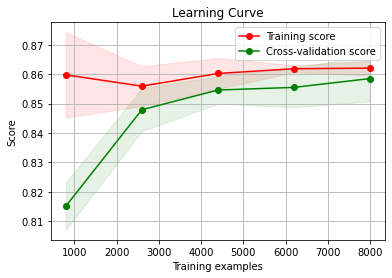

In [20]:
# reimport to make sure data is clean and not related from decision tree manipulation

df_bank_churn = pd.read_csv('bankchurn.csv')

#clean ups
df_bank_churn = df_bank_churn.drop(columns=['RowNumber','Surname','CustomerId'], axis = 1)
df_bank_churn['Gender'] = df_bank_churn['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 0 if x== 'France' else x)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 1 if x== 'Spain' else x)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 2 if x== 'Germany' else x)


target_column = ['Exited'] 
predictors = list(set(list(df_bank_churn.columns))-set(target_column))
df_bank_churn[predictors] = df_bank_churn[predictors]/df_bank_churn[predictors].max()

X = df_bank_churn[predictors].values
y = df_bank_churn[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=6)


start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='adam', max_iter=500, random_state=6)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
nn_accuracy = accuracy_score(y_train, predict_train)

print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))
print('Accuracy of train neural network is %.2f%%' % (nn_accuracy * 100))

nn_accuracy = accuracy_score(y_test, predict_test)

print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))
print('Accuracy of test neural network is %.2f%%' % (nn_accuracy * 100))
print("Time taken relu-adam: ", time.time() - start_time)

est.plot_learning_curve(mlp, X, y)
plt.show()

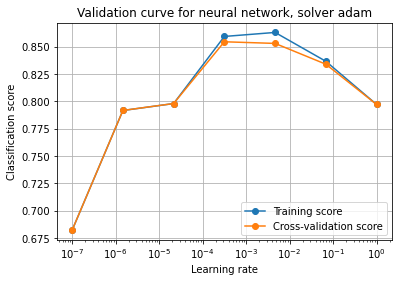

In [23]:
learning_range = np.logspace(-7, 0, 7)
train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=learning_range, 
                                             cv=5)

plt.figure()
plt.semilogx(lr_range, np.mean(train_scores, axis=1),'o-', label='Training score')
plt.semilogx(lr_range, np.mean(test_scores, axis=1),'o-', label='Cross-validation score')
plt.title('Validation curve for neural network, solver adam')
plt.xlabel('Learning rate')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()

In [13]:
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='lbfgs', max_iter=500, random_state=6)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
nn_accuracy = accuracy_score(y_train, predict_train)

print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))
print('Accuracy of train neural network is %.2f%%' % (nn_accuracy * 100))

nn_accuracy = accuracy_score(y_test, predict_test)

print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))
print('Accuracy of test neural network is %.2f%%' % (nn_accuracy * 100))
print("Time taken relu-lbfgs: ", time.time() - start_time)
# est.plot_learning_curve(mlp, X, y)
# plt.show()

[[4594  189]
 [ 637  580]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4783
           1       0.75      0.48      0.58      1217

    accuracy                           0.86      6000
   macro avg       0.82      0.72      0.75      6000
weighted avg       0.85      0.86      0.85      6000

Accuracy of train neural network is 86.23%
[[3044  136]
 [ 427  393]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3180
           1       0.74      0.48      0.58       820

    accuracy                           0.86      4000
   macro avg       0.81      0.72      0.75      4000
weighted avg       0.85      0.86      0.85      4000

Accuracy of test neural network is 85.92%
Time taken relu-lbfgs:  4.377631664276123


In [24]:
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='sgd', max_iter=500, random_state=6)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
nn_accuracy = accuracy_score(y_train, predict_train)

print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))
print('Accuracy of train neural network is %.2f%%' % (nn_accuracy * 100))

nn_accuracy = accuracy_score(y_test, predict_test)

print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))
print('Accuracy of test neural network is %.2f%%' % (nn_accuracy * 100))
print("Time taken relu-sgd: ", time.time() - start_time)

[[4622  161]
 [ 888  329]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4783
           1       0.67      0.27      0.39      1217

    accuracy                           0.83      6000
   macro avg       0.76      0.62      0.64      6000
weighted avg       0.80      0.83      0.79      6000

Accuracy of train neural network is 82.52%
[[3058  122]
 [ 609  211]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3180
           1       0.63      0.26      0.37       820

    accuracy                           0.82      4000
   macro avg       0.73      0.61      0.63      4000
weighted avg       0.79      0.82      0.79      4000

Accuracy of test neural network is 81.73%
Time taken relu-sgd:  8.031487464904785


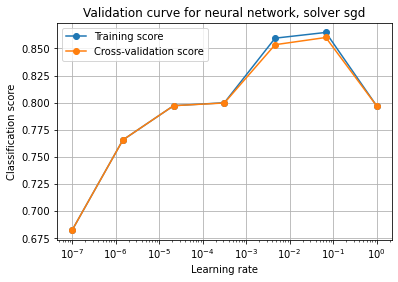

In [25]:
learning_range = np.logspace(-7, 0, 7)
train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=learning_range, 
                                             cv=5)

plt.figure()
plt.semilogx(lr_range, np.mean(train_scores, axis=1),'o-', label='Training score')
plt.semilogx(lr_range, np.mean(test_scores, axis=1),'o-', label='Cross-validation score')
plt.title('Validation curve for neural network, solver sgd')
plt.xlabel('Learning rate')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()

# Neural Networks (Dataset 2) Brain Stroke

[[2843    1]
 [ 141    3]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2844
           1       0.75      0.02      0.04       144

    accuracy                           0.95      2988
   macro avg       0.85      0.51      0.51      2988
weighted avg       0.94      0.95      0.93      2988

adam Accuracy of train neural network is 95.25%
[[1888    1]
 [ 104    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1889
           1       0.00      0.00      0.00       104

    accuracy                           0.95      1993
   macro avg       0.47      0.50      0.49      1993
weighted avg       0.90      0.95      0.92      1993

adam Accuracy of test neural network is 94.73%
Time taken relu-adam:  3.4757704734802246


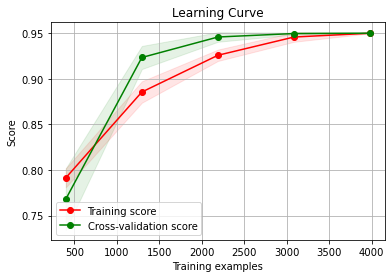

[[2838    6]
 [ 127   17]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2844
           1       0.74      0.12      0.20       144

    accuracy                           0.96      2988
   macro avg       0.85      0.56      0.59      2988
weighted avg       0.95      0.96      0.94      2988

lbfgs Accuracy of train neural network is 95.55%
[[1878   11]
 [ 102    2]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1889
           1       0.15      0.02      0.03       104

    accuracy                           0.94      1993
   macro avg       0.55      0.51      0.50      1993
weighted avg       0.91      0.94      0.92      1993

lbfgs Accuracy of test neural network is 94.33%
Time taken relu-lbfgs:  2.584449529647827
[[2844    0]
 [ 144    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2844
           1     

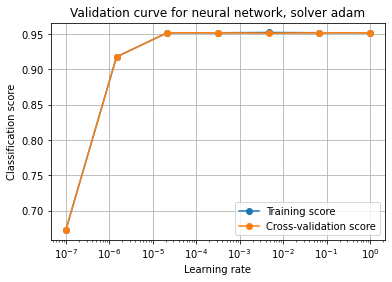

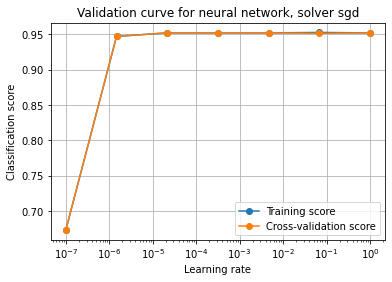

In [33]:
#import clean data
df_bs = pd.read_csv('brainstroke.csv')
df_bs['gender'] = df_bs['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_bs['ever_married'] = df_bs['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df_bs['Residence_type'] = df_bs['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 1 if x == 'Private' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 2 if x == 'Self-employed' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 3 if x == 'Govt_job' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 4 if x == 'children' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 2 if x == 'smokes' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 3 if x == 'never smoked' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 4 if x == 'Unknown' else x)


target_column = ['stroke'] 
predictors = list(set(list(df_bs.columns))-set(target_column))
df_bs[predictors] = df_bs[predictors]/df_bs[predictors].max()

X = df_bs[predictors].values
y = df_bs[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=6)

solvers_arr = ['adam','lbfgs','sgd']

for sol in solvers_arr:
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver=sol, max_iter=500, random_state=6)
    mlp.fit(X_train,y_train)

    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    nn_accuracy = accuracy_score(y_train, predict_train)

    print(confusion_matrix(y_train,predict_train))
    print(classification_report(y_train,predict_train))
    print(sol+' Accuracy of train neural network is %.2f%%' % (nn_accuracy * 100))

    nn_accuracy = accuracy_score(y_test, predict_test)

    print(confusion_matrix(y_test,predict_test))
    print(classification_report(y_test,predict_test))
    print(sol+' Accuracy of test neural network is %.2f%%' % (nn_accuracy * 100))
    print("Time taken relu-"+ sol+": ", time.time() - start_time)
    if sol == 'adam':
        est.plot_learning_curve(mlp, X, y)
        plt.show()
    if sol == 'adam' or sol == 'sgd':
        learning_range = np.logspace(-7, 0, 7)
        train_scores, test_scores = validation_curve(mlp, X_train, y_train, param_name="learning_rate_init", param_range=learning_range, 
                                                     cv=5)

        plt.figure()
        plt.semilogx(lr_range, np.mean(train_scores, axis=1),'o-', label='Training score')
        plt.semilogx(lr_range, np.mean(test_scores, axis=1),'o-', label='Cross-validation score')
        plt.title('Validation curve for neural network, solver '+sol)
        plt.xlabel('Learning rate')
        plt.ylabel("Classification score")
        plt.legend(loc="best")
        plt.grid()

## Boosting (Dataset 1) Bank Churn

Accuracy of Adaboost without hyperparameter tuning is 85.15%


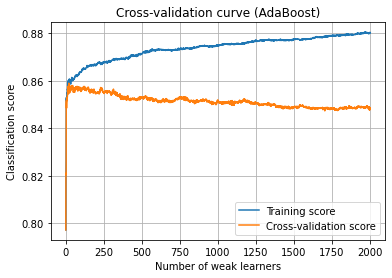

In [11]:
df_bank_churn = pd.read_csv('bankchurn.csv')

#clean ups
df_bank_churn = df_bank_churn.drop(columns=['RowNumber','Surname','CustomerId'], axis = 1)
df_bank_churn['Gender'] = df_bank_churn['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 0 if x== 'France' else x)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 1 if x== 'Spain' else x)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 2 if x== 'Germany' else x)


target_column = ['Exited'] 
predictors = list(set(list(df_bank_churn.columns))-set(target_column))
df_bank_churn[predictors] = df_bank_churn[predictors]/df_bank_churn[predictors].max()

X = df_bank_churn[predictors].values
y = df_bank_churn[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=6)


clf_boosted = AdaBoostClassifier(random_state=6)
clf_boosted.fit(X_train, y_train)
y_pred = clf_boosted.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Adaboost without hyperparameter tuning is %.2f%%' % (accuracy * 100))
# Define AdaBoost learner
num_learners = 2000

clf_boosted = AdaBoostClassifier(n_estimators=num_learners, random_state=6)

# Cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds)
train_scores = np.zeros((num_learners, num_folds))
val_scores = np.zeros((num_learners, num_folds))
for idx, (train_index, test_index) in enumerate(kf.split(X_train)):
    clf_boosted.fit(X_train[train_index], y_train[train_index])
    train_scores[:, idx] = np.asarray(list(clf_boosted.staged_score(X_train[train_index], y_train[train_index])))
    val_scores[:, idx] = np.asarray(list(clf_boosted.staged_score(X_train[test_index], y_train[test_index])))

n_estimators_range = np.arange(num_learners) + 1
plt.figure()
plt.plot(n_estimators_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(n_estimators_range, np.mean(val_scores, axis=1), label='Cross-validation score')
plt.title('Cross-validation curve (AdaBoost)')
plt.xlabel('Number of weak learners')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [12]:
rf = RandomForestClassifier()

num_learners_optimal = np.argmax(np.mean(val_scores, axis=1)) + 1
print('Optimal number of learners for AdaBoost: %d' % num_learners_optimal)
best_clf_boosted = AdaBoostClassifier(base_estimator=rf, n_estimators=num_learners_optimal, random_state=6) #86.08
#best_clf_boosted = AdaBoostClassifier(n_estimators=num_learners_optimal, random_state=6)
start_time = time.time()
best_clf_boosted.fit(X_train, y_train)
print('Completed training in:',time.time() - start_time)
y_pred = best_clf_boosted.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Adaboost with the best hyperparameters is %.2f%%' % (accuracy * 100))


Optimal number of learners for AdaBoost: 21
Completed training in: 1.9474172592163086
Accuracy of Adaboost with the best hyperparameters is 86.12%


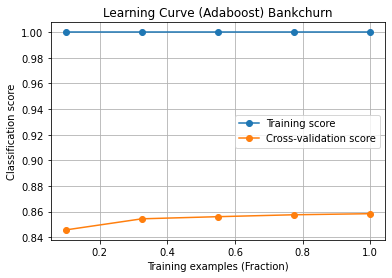

In [5]:
train_sizes = np.linspace(0.1, 1.0, 5)
best_clf_boosted = AdaBoostClassifier(base_estimator=rf,n_estimators=num_learners_optimal, random_state=6)
_, train_scores, test_scores = learning_curve(best_clf_boosted, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve (Adaboost) Bankchurn')
plt.xlabel('Training examples (Fraction)')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Boosting (Dataset 2) BrainStroke

Accuracy of Adaboost without hyperparameter tuning is 94.73%


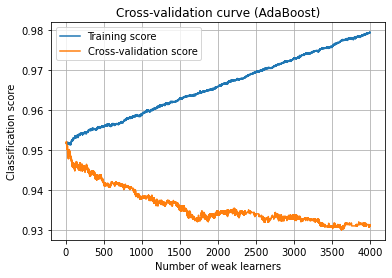

In [6]:
df_bs = pd.read_csv('brainstroke.csv')
df_bs['gender'] = df_bs['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_bs['ever_married'] = df_bs['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df_bs['Residence_type'] = df_bs['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 1 if x == 'Private' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 2 if x == 'Self-employed' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 3 if x == 'Govt_job' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 4 if x == 'children' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 2 if x == 'smokes' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 3 if x == 'never smoked' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 4 if x == 'Unknown' else x)


target_column = ['stroke'] 
predictors = list(set(list(df_bs.columns))-set(target_column))
df_bs[predictors] = df_bs[predictors]/df_bs[predictors].max()

X = df_bs[predictors].values
y = df_bs[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=6)


clf_boosted = AdaBoostClassifier(random_state=6)
clf_boosted.fit(X_train, y_train)
y_pred = clf_boosted.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Adaboost without hyperparameter tuning is %.2f%%' % (accuracy * 100))

num_learners = 4000

clf_boosted = AdaBoostClassifier(n_estimators=num_learners, random_state=6)

# Cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds)
train_scores = np.zeros((num_learners, num_folds))
val_scores = np.zeros((num_learners, num_folds))
for idx, (train_index, test_index) in enumerate(kf.split(X_train)):
    clf_boosted.fit(X_train[train_index], y_train[train_index])
    train_scores[:, idx] = np.asarray(list(clf_boosted.staged_score(X_train[train_index], y_train[train_index])))
    val_scores[:, idx] = np.asarray(list(clf_boosted.staged_score(X_train[test_index], y_train[test_index])))

n_estimators_range = np.arange(num_learners) + 1
plt.figure()
plt.plot(n_estimators_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(n_estimators_range, np.mean(val_scores, axis=1), label='Cross-validation score')
plt.title('Cross-validation curve (AdaBoost)')
plt.xlabel('Number of weak learners')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [10]:
num_learners_optimal = np.argmax(np.mean(val_scores, axis=1)) + 1
print('Optimal number of learners for AdaBoost: %d' % num_learners_optimal)
best_clf_boosted = AdaBoostClassifier(n_estimators=num_learners_optimal, random_state=6)
start_time = time.time()
best_clf_boosted.fit(X_train, y_train)
print('Completed training in:', time.time() - start_time)
y_pred = best_clf_boosted.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Adaboost with the best hyperparameters is %.2f%%' % (accuracy * 100))

Optimal number of learners for AdaBoost: 9
Completed training in: 0.029000282287597656
Accuracy of Adaboost with the best hyperparameters is 94.78%


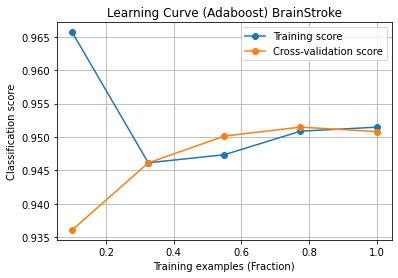

In [26]:
train_sizes = np.linspace(0.1, 1.0, 5)
best_clf_boosted = AdaBoostClassifier(n_estimators=num_learners_optimal, random_state=6)
_, train_scores, test_scores = learning_curve(best_clf_boosted, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve (Adaboost) BrainStroke')
plt.xlabel('Training examples (Fraction)')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

## KNN (Dataset 1) Bank Churn

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Accuracy of kNN  is 81.27%


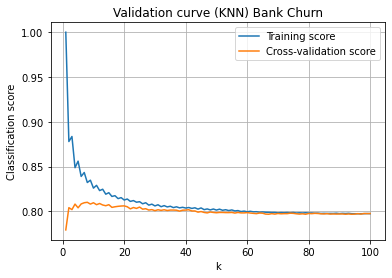

In [36]:
df_bank_churn = pd.read_csv('bankchurn.csv')

#clean ups
df_bank_churn = df_bank_churn.drop(columns=['RowNumber','Surname','CustomerId'], axis = 1)
df_bank_churn['Gender'] = df_bank_churn['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 0 if x== 'France' else x)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 1 if x== 'Spain' else x)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 2 if x== 'Germany' else x)


target_column = ['Exited'] 
predictors = list(set(list(df_bank_churn.columns))-set(target_column))
df_bank_churn[predictors] = df_bank_churn[predictors]/df_bank_churn[predictors].max()

X = df_bank_churn[predictors].values
y = df_bank_churn[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=6)

k_range = np.arange(1, 101)
clf = KNeighborsClassifier()
print(clf.get_params())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy of kNN  is %.2f%%' % (acc * 100))

train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name="n_neighbors", 
                                             param_range=np.arange(1, 101), cv=5)

plt.figure()
plt.plot(k_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(k_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve (KNN) Bank Churn')
plt.xlabel('k')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

Optimal value of k: 8
Time taken: 0.02096271514892578
Accuracy of kNN with k = 8 is 81.10%


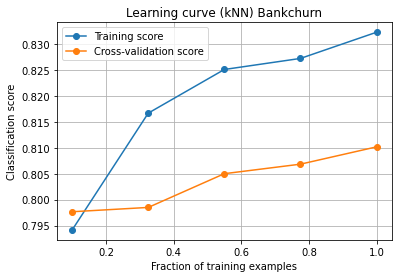

In [37]:
k_optimal = np.argmax(np.mean(test_scores, axis=1)) + 1
print('Optimal value of k: %d' % k_optimal)
best_clf_knn = KNeighborsClassifier(n_neighbors=k_optimal)
start_time = time.time()
best_clf_knn.fit(X_train, y_train)
print("Time taken:", time.time() - start_time)
y_pred = best_clf_knn.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of kNN with k = %d is %.2f%%' % (k_optimal, best_accuracy * 100))

train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(best_clf_knn, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve (kNN) Bankchurn')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

## KNN (Dataset 2) Brain Stroke

In [38]:
df_bs = pd.read_csv('brainstroke.csv')
df_bs['gender'] = df_bs['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_bs['ever_married'] = df_bs['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df_bs['Residence_type'] = df_bs['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 1 if x == 'Private' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 2 if x == 'Self-employed' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 3 if x == 'Govt_job' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 4 if x == 'children' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 2 if x == 'smokes' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 3 if x == 'never smoked' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 4 if x == 'Unknown' else x)


target_column = ['stroke'] 
predictors = list(set(list(df_bs.columns))-set(target_column))
df_bs[predictors] = df_bs[predictors]/df_bs[predictors].max()

X = df_bs[predictors].values
y = df_bs[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=6)

k_range = np.arange(1, 101)
clf = KNeighborsClassifier()
print(clf.get_params())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy of kNN  is %.2f%%' % (acc * 100))

train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name="n_neighbors", 
                                             param_range=np.arange(1, 101), cv=5)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Accuracy of kNN  is 94.63%


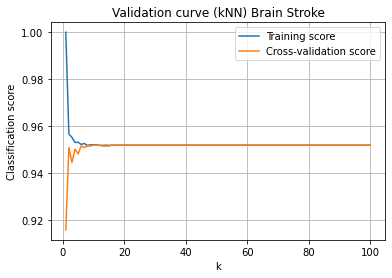

In [19]:
plt.figure()
plt.plot(k_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(k_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve (kNN) Brain Stroke')
plt.xlabel('k')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

Optimal value of k: 10
Time taken: 0.009562253952026367
Accuracy of kNN with k = 10 is 94.78%


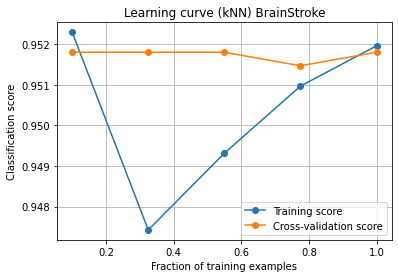

In [39]:
k_optimal = np.argmax(np.mean(test_scores, axis=1)) + 1
print('Optimal value of k: %d' % k_optimal)
best_clf_knn = KNeighborsClassifier(n_neighbors=k_optimal)
start_time = time.time()
best_clf_knn.fit(X_train, y_train)
print("Time taken:", time.time() - start_time)
y_pred = best_clf_knn.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of kNN with k = %d is %.2f%%' % (k_optimal, best_accuracy * 100))

train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(best_clf_knn, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve (kNN) BrainStroke')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

## SVM (Data Set 1) Bank Churn

In [40]:
df_bank_churn = pd.read_csv('bankchurn.csv')

#clean ups
df_bank_churn = df_bank_churn.drop(columns=['RowNumber','Surname','CustomerId'], axis = 1)
df_bank_churn['Gender'] = df_bank_churn['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 0 if x== 'France' else x)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 1 if x== 'Spain' else x)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 2 if x== 'Germany' else x)


target_column = ['Exited'] 
predictors = list(set(list(df_bank_churn.columns))-set(target_column))
df_bank_churn[predictors] = df_bank_churn[predictors]/df_bank_churn[predictors].max()

X = df_bank_churn[predictors].values
y = df_bank_churn[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=6)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


clf = LinearSVC(random_state=6)
clf.fit(X_train, y_train.ravel()) 

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test.ravel(), y_pred)
print('Accuracy of Linear SVC  is %.2f%%' % (acc * 100))

Accuracy of Linear SVC  is 79.50%


In [41]:
C_range = np.logspace(-3, 10, 7)
train_scores, test_scores = validation_curve(clf, X_train, y_train.ravel(), param_name="C", param_range=C_range, cv=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    6.7s finished


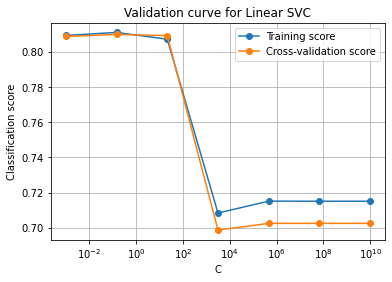

In [42]:
plt.figure()
plt.semilogx(C_range, np.mean(train_scores, axis=1), 'o-',label='Training score')
plt.semilogx(C_range, np.mean(test_scores, axis=1), 'o-',label='Cross-validation score')
plt.title('Validation curve for Linear SVC')
plt.xlabel('C')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [43]:
C_range = np.logspace(-3, 10, 7)
tuned_params = {'C' : C_range}
svm_linear = GridSearchCV(clf, param_grid=tuned_params, cv=5)
start_time = time.time()
svm_linear.fit(X_train, y_train)
print("time taken:", time.time() - start_time)
best_clf_svm = svm_linear
best_params = svm_linear.best_params_
print("Best parameters set found on train set:")
print(best_params)
y_pred = best_clf_svm.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)
print('Best accuracy with SVM (linear kernel) is %.2f%%' % (best_accuracy * 100))

time taken: 6.294343709945679
Best parameters set found on train set:
{'C': 0.1467799267622069}
Best accuracy with SVM (linear kernel) is 79.50%


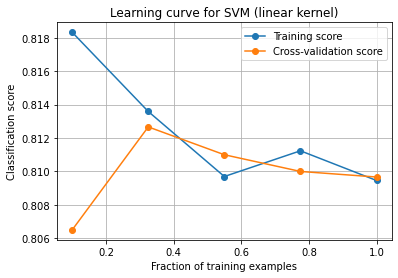

In [44]:
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(best_clf_svm, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for SVM (linear kernel)')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [47]:
clf = svm.SVC(kernel='sigmoid', random_state=6)
start_time = time.time()
clf.fit(X_train, y_train.ravel()) 
print("time taken:", time.time() - start_time)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test.ravel(), y_pred)
print('Accuracy of Sigmoid SVC is %.2f%%' % (acc * 100))

time taken: 1.3319470882415771
Accuracy of Sigmoid SVC is 79.50%


In [46]:
C_range = np.logspace(-3, 10, 7)
train_scores, test_scores = validation_curve(clf, X_train, y_train.ravel(), param_name="C", param_range=C_range, cv=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   42.2s finished


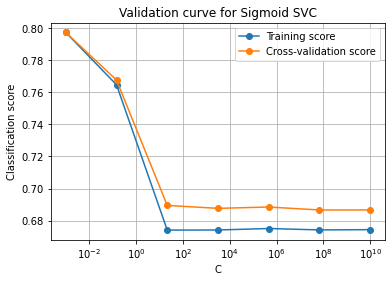

In [39]:
plt.figure()
plt.semilogx(C_range, np.mean(train_scores, axis=1), 'o-',label='Training score')
plt.semilogx(C_range, np.mean(test_scores, axis=1), 'o-',label='Cross-validation score')
plt.title('Validation curve for Sigmoid SVC')
plt.xlabel('C')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [48]:
C_range = np.logspace(0, 10, 7)
tuned_params = {'C' : C_range}
svm_sigmoid = GridSearchCV(clf, param_grid=tuned_params, cv=5)
start_time = time.time()
svm_sigmoid.fit(X_train, y_train)
print("time taken:", time.time() - start_time)
best_clf_svm = svm_sigmoid
best_params = svm_sigmoid.best_params_
print("Best parameters set found on train set:")
print(best_params)
y_pred = best_clf_svm.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)
print('Best accuracy with SVM (Sigmoid) is %.2f%%' % (best_accuracy * 100))

time taken: 26.51007056236267
Best parameters set found on train set:
{'C': 1.0}
Best accuracy with SVM (Sigmoid) is 79.50%


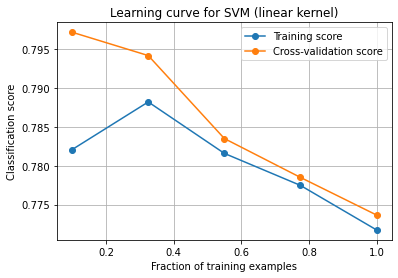

In [31]:
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(best_clf_svm, X_train, y_train, train_sizes=train_sizes, cv=5)

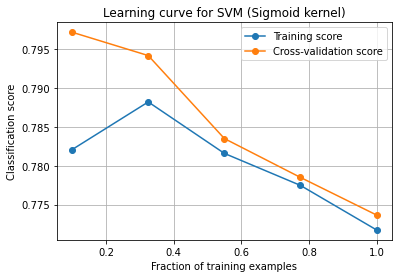

In [32]:
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for SVM (Sigmoid kernel)')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

## SVM (Dataset 2) Brainstroke

In [51]:
#import clean data
df_bs = pd.read_csv('brainstroke.csv')
df_bs['gender'] = df_bs['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_bs['ever_married'] = df_bs['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df_bs['Residence_type'] = df_bs['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 1 if x == 'Private' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 2 if x == 'Self-employed' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 3 if x == 'Govt_job' else x)
df_bs['work_type'] = df_bs['work_type'].apply(lambda x: 4 if x == 'children' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 2 if x == 'smokes' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 3 if x == 'never smoked' else x)
df_bs['smoking_status'] = df_bs['smoking_status'].apply(lambda x: 4 if x == 'Unknown' else x)


target_column = ['stroke'] 
predictors = list(set(list(df_bs.columns))-set(target_column))
df_bs[predictors] = df_bs[predictors]/df_bs[predictors].max()

X = df_bs[predictors].values
y = df_bs[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=6)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
clf = LinearSVC(random_state=6)
clf.fit(X_train, y_train.ravel()) 

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test.ravel(), y_pred)
print('Accuracy of Linear SVC  is %.2f%%' % (acc * 100))

Accuracy of Linear SVC  is 94.78%


In [42]:
C_range = np.logspace(-3, 10, 7)
train_scores, test_scores = validation_curve(clf, X_train, y_train.ravel(), param_name="C", param_range=C_range, cv=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    2.5s finished


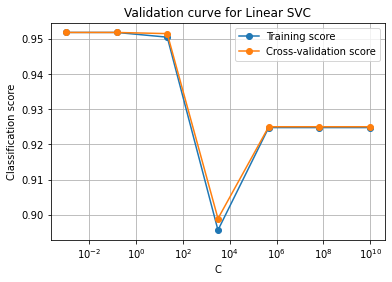

In [43]:
plt.figure()
plt.semilogx(C_range, np.mean(train_scores, axis=1),'o-' ,label='Training score')
plt.semilogx(C_range, np.mean(test_scores, axis=1),'o-' ,label='Cross-validation score')
plt.title('Validation curve for Linear SVC')
plt.xlabel('C')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [50]:
C_range = np.logspace(-3, 10, 7)
tuned_params = {'C' : C_range}
svm_linear = GridSearchCV(clf, param_grid=tuned_params, cv=5)
start_time = time.time()
svm_linear.fit(X_train, y_train)
print("time taken:", time.time() - start_time)
best_clf_svm = svm_linear
best_params = svm_linear.best_params_
print("Best parameters set found on train set:")
print(best_params)
y_pred = best_clf_svm.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)
print('Best accuracy with SVM (linear kernel) is %.2f%%' % (best_accuracy * 100))

time taken: 2.5689618587493896
Best parameters set found on train set:
{'C': 0.001}
Best accuracy with SVM (linear kernel) is 94.78%


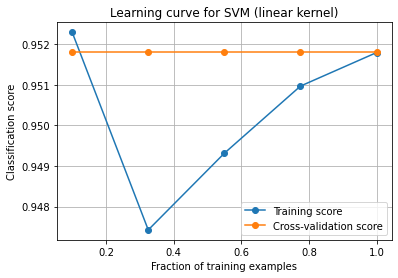

In [45]:
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(best_clf_svm, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for SVM (linear kernel)')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [52]:
clf = svm.SVC(kernel='sigmoid', random_state=6)
clf.fit(X_train, y_train.ravel()) 

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test.ravel(), y_pred)
print('Accuracy of Sigmoid SVC is %.2f%%' % (acc * 100))

Accuracy of Sigmoid SVC is 94.78%


In [50]:
C_range = np.logspace(-3, 10, 7)
train_scores, test_scores = validation_curve(clf, X_train, y_train.ravel(), param_name="C", param_range=C_range, cv=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    2.4s finished


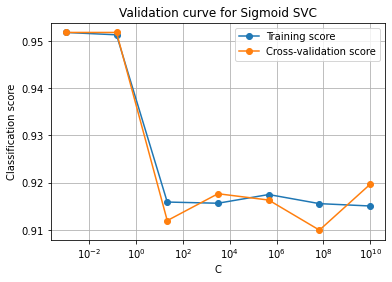

In [51]:
plt.figure()
plt.semilogx(C_range, np.mean(train_scores, axis=1),'o-' ,label='Training score')
plt.semilogx(C_range, np.mean(test_scores, axis=1), 'o-',label='Cross-validation score')
plt.title('Validation curve for Sigmoid SVC')
plt.xlabel('C')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [53]:
C_range = np.logspace(-1, 5, 7)
tuned_params = {'C' : C_range}
svm = GridSearchCV(clf, param_grid=tuned_params, cv=5)
start_time = time.time()
svm.fit(X_train, y_train)
print("time taken:", time.time() - start_time)
best_clf_svm = svm
best_params = svm.best_params_
print("Best parameters set found on train set:")
print(best_params)
y_pred = best_clf_svm.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)
print('Best accuracy with SVM (Sigmoid) is %.2f%%' % (best_accuracy * 100))

time taken: 1.6001605987548828
Best parameters set found on train set:
{'C': 0.1}
Best accuracy with SVM (Sigmoid) is 94.78%


In [53]:
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(best_clf_svm, X_train, y_train, train_sizes=train_sizes, cv=5)

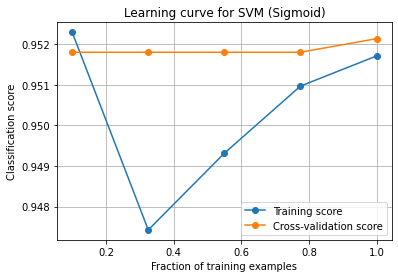

In [54]:
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for SVM (Sigmoid)')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()